# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Florencia Vargas
- Nombre de alumno 2: Mario Romero

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. los datos de entrenamiento son utilizados para ajustar (entrenar ) el modelo y los de validacion para evaluar el desempeño (con diferentes metricas).
2. la gran dificultad es que no hay etiquetas, por lo que no sabemos si estan bien clasificados.
3. matriz para comparar desempeño, donde estan los datos reales vs la predicion. Se utiliza para calcular metricas y evaluar el desempeño.
4.
primero definimos:
  * TP: true positive - verdaderos postivo
  * TN: true negative - verdadros negativos
  * FP: False positive - falsos positivos
  * FN: False negative - falsos negative

Acurracy: % de predicciones correctas
  
  * ac = (TP+TN)/(TP+TN+FP+FN)

Precision:% de positivos son correctos, sobre los postivos clasificados
 * Pre= (TP)/(TP+FP)

Recall: % de postivos reales son correctos, sobre los reales postivos
 * Recall= (TP)/(TP+FN)

F1 score: balance  de recall y presicion

* F1= 2*(Presicion*Recall)/(Presicion+Recall)

5.   


  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  -> acurrcy, por que  buscamos que sean lo mas precisas las predicciones, ya que es contraproducente tener la maquina parada por que si.

  * Detección de enfermedades altamente contagiosas. -> es pclave detectar a todos los enfermos aunque tengamos unos falsos positivos


  * Aprobación de créditos de alto riesgo. -> precision: ya que buscams minimizar la cantidad de errores de credito (a personas q no pagaran)

  * Detección de crímenes. -> recall, ya que es mejor identificar a todos y a otros FP que post invrestigacion queden librees.

6. La calibracion del modelo corresponde a reajustar las probabilidades predichas para que tengan sentdo con la proporcion rel de observados, osea corregir probabilidades. por ejemplo cuando un modelo tiene una probilidad predicha de 0.9 se espera que en el 90% de los casos haga predicciones correctas. Basicamente se usa para que el modelo refleje lo predicho.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [31]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/stats_players.csv' #ruta mario
    #path = '' #ruta flo

except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
df = pd.read_csv(path)

In [34]:
df.head(5)

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [35]:
#1
df['label'] = df['National_Position'].notna().astype(int)

In [36]:
#2:
na = df['label'].value_counts()
print(na)

label
0    16513
1     1075
Name: count, dtype: int64


se observa que la variable 0 esta 15 veces más, osea estan desbalanceadas la clase

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [38]:
#3 primero vmos a separar la comunas a ajustar, separadas e transformaciones std,minmax y onehot (en ese orden)
# no vamos a uar unas como name,
numericas_std = ['Age', 'Weak_foot', 'Skill_Moves','Ball_Control','Standing_Tackle','Aggression','Reactions', 'Vision','Composure', 'Speed','Finishing','Strength']
numericas_minmax = [  'Weight']
categoricas = ['Club_Position', 'National_Position', 'Preffered_Foot', 'Nationality', 'National_Position']

col_transformer = ColumnTransformer(
    transformers=[
        ('num_std', StandardScaler(), numericas_std),
        ('num_minmax', MinMaxScaler(), numericas_minmax),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
    ],
    remainder='drop'  # elimina columnas no especificadas
)

nos quedamos co algunas nomas, por que hay variabless altamente corr, entonces nos quedmos con una de esas. Las transformaciones se hicieron dependiendo del tipo de valor que tenia la columna.

In [39]:
#aplicamos el col transformer

x = df.drop(columns=['label'])
y = df['label'] # sacamos la var a predecir
df_transformed = col_transformer.fit_transform(x)

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [40]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [41]:
#1
# Separar los datos
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,              # prediccion
    test_size=0.2,  # proporcion 80 20 de toda la vida
    random_state=1,  # seteamos semilla
    stratify=y      # balance de clasea acorde
)


In [42]:
#2

# Pipeline para XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessing', col_transformer),  # column transformer
    ('classifier', XGBClassifier(random_state=1))  #  XGBoost
])

# Pipeline para LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessing', col_transformer),   # column transformer
    ('classifier', LGBMClassifier(random_state=1))  # l GBM
])

In [43]:
#3

# XGBoost
pipeline_xgboost.fit(X_train, y_train)

# l GBM
pipeline_lightgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_std',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Age', 'Weak_foot',
                                                   'Skill_Moves',
                                                   'Ball_Control',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Vision', 'Composure',
                                                   'Speed', 'Finishing',...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=1, reg_alpha=0.0, reg_lambda=0.0,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [45]:
# 1

# prueba
y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgbm = pipeline_lightgbm.predict(X_test)

print("--------------------------------------------------------------")


#  XGBoost
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_xgb, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb)) # usamos lo recomendado

print("--------------------------------------------------------------")

# tGBM
print("\n LightGBM ")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_lgbm, pos_label=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))# usamos lo recomendado


--------------------------------------------------------------
XGBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3303
           1       1.00      1.00      1.00       215

    accuracy                           1.00      3518
   macro avg       1.00      1.00      1.00      3518
weighted avg       1.00      1.00      1.00      3518

--------------------------------------------------------------

 LightGBM 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3303
           1       1.00      1.00      1.00       215

    accuracy                           1.00      3518
   macro avg       1.00      1.00      1.00      3518
weighted avg       1.00      1.00      1.00      3518



Tiene pinta de sobre ajuste ya que tien clasifiación =1. Trate de cambiar el % de test y train y seguia clasificando perfecto

2.

En general clasifico todos los seleccionados e manera perfecta.
para el caso de acurracy clasifico a todos los selccionados y no seleccionados bien.


sobre precision, todos los que eran seleccionados segun el modelo, eran correctamente seelccionados.

sobre recall el modelo no clasifico mal a un  seleccionado comp no seleccionado.

Sobre el desbalance de clases, debió afectar al rendimiento del modelo, si es que no ssu hubiera usado a tecnica para balancerlos en el split (stratify=y )


3.  En este caso lo mas relevante es el recall, ya que nos importa mas identificar corerectamente a todos los jugadores seleccionados, un FN es mas grave que  un FP

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [46]:
df_2 = pd.read_csv(path)


In [47]:
df_2.head(2)

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85


In [48]:

# def posicion
def asignar_label(pos):
    if pos in ['ST', 'CF']:
        return 'ataque'
    elif pos in ['RW', 'CAM', 'LW']:
        return 'central_ataque'
    elif pos in ['RM', 'CM', 'LM']:
        return 'central'
    elif pos in ['RWB', 'CDM', 'LWB']:
        return 'central_defensa'
    elif pos in ['RB', 'CB', 'LB']:
        return 'defensa'
    elif pos in ['GK']:
        return 'arquero'
    else:
        return 'otros'

df_2['label'] = df_2['Club_Position'].apply(asignar_label)

In [49]:
#2;
# Contamos cuántos hay por clase
conteo_labels = df_2['label'].value_counts()
print("Conteo por clase:")
print(conteo_labels)

Conteo por clase:
label
otros              13649
defensa             1180
central              907
arquero              632
central_ataque       581
ataque               430
central_defensa      209
Name: count, dtype: int64


tiene clases mas presentes que otras.
Ademas eliminaremos las filas donde hay como calor "otros"

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [51]:
df_2 = df_2[df_2['label'] != 'otros'].copy()
df_2 = df_2.drop(columns=['names'])


KeyError: "['names'] not found in axis"

In [53]:
#entrenamos el nuevo pipline
#vamos a usar solo ciertas Columnas:

x = df_2.drop(columns=['label']) #eliminamos la etiqueta
y = df_2['label'] #  la var a predecir

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


#ahora pasamos cat conn un hotone
categorical_features = x.select_dtypes(include='object').columns.tolist()
numerical_features = x.select_dtypes(exclude='object').columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Crear pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])

In [54]:
# Entrenar
pipeline.fit(X_train, y_train)

# Evaluar
y_pred = pipeline.predict(X_test)
print("\clasificacion:")
print(classification_report(y_test, y_pred))

\clasificacion:
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.99      1.00      0.99        86
        central       0.97      0.98      0.98       182
 central_ataque       0.99      0.98      0.99       116
central_defensa       0.96      0.52      0.68        42
        defensa       0.93      1.00      0.96       236

       accuracy                           0.97       788
      macro avg       0.97      0.91      0.93       788
   weighted avg       0.97      0.97      0.96       788



se comporta similar para clasificar todas las posicones, destaca la de arquero con un 100% de efeectivdad. defensa central es a la que le va peor en la clasificación, pero es por su baja cnatidad de datos. como oportunidad de mejora se pudo haber agregafo en el pipelne un balceo

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [55]:
!pip install catboost


In [56]:
!pip install pycaret


In [57]:
from pycaret.datasets import get_data
from pycaret.classification import *
import pandas as pd
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"


# Crear la variable objetivo como en el notebook
df['label'] = df['National_Position'].notna().astype(int)

# Iniciar PyCaret
clf_setup = setup(data=df, target='label',
                  session_id=123,
                  verbose=False,
                  fold=5,
                  html=False)

# Comparar modelos según precisión (minimizar falsos positivos)
best_model = compare_models(sort='Precision',
                            include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'])

# Evaluar el mejor modelo
evaluate_model(best_model)



                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9574  0.9351  0.3151  0.9639   
et                 Extra Trees Classifier    0.9500  0.8937  0.1941  0.9355   
dt               Decision Tree Classifier    0.9383  0.5009  0.0027  0.1333   
xgboost         Extreme Gradient Boosting    0.9383  0.8621  0.0027  0.1333   
lightgbm  Light Gradient Boosting Machine    0.9383  0.7926  0.0027  0.1333   
catboost              CatBoost Classifier    0.9383  0.8785  0.0027  0.1333   

              F1   Kappa     MCC  TT (Sec)  
rf        0.4734  0.4573  0.5370     2.654  
et        0.3188  0.3047  0.4107     1.276  
dt        0.0052  0.0035  0.0121     0.858  
xgboost   0.0052  0.0035  0.0121     0.914  
lightgbm  0.0052  0.0035  0.0121     2.140  
catboost  0.0052  0.0035  0.0121    12.590  


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

El dt es un arbol de decisión, el cual es un modelo que divide el conjunto de datos en ramas según condiciones lógicas y que en cada nodo va tomando una decision hasta llegar a una hoja la cual seria la predicción. Es facil de interpretar pero muy propenso al sobreajuste
El rf es el random forest que es un conjunto de muchos árboles de decisión entrenados con distintas partes aleatorias de los datos, y que la prediccion se obtiene mediante un promedio de los resultados de cada arbol. Es un modelo robusto y preciso, ya que reduce el sobreajuste en comparación al arbol de decisión
El et es un modelo que elige divisiones de forma completamente aleatoria y no buscando la mejor, por lo que es más rapido y menos propenso al sobreajuste.

El modelo seleccionado, Random Forest, muestra un alto rendimiento en términos de precisión y velocidad, con una gran cantidad de verdaderos negativos (4950) y una buena cantidad de verdaderos positivos (102), aunque aún presenta 221 falsos negativos, lo que indica margen de mejora en la detección de la clase positiva. El umbral por defecto del modelo no parece ser el óptimo, ya que ajustar dicho valor podría mejorar el recall sin sacrificar demasiado la precisión. En cuanto a la importancia de variables, destacan “Name” y “National_Position”, lo cual puede deberse a que estas variables contienen información clave o codificada relacionada con la clase objetivo. Finalmente, la curva de aprendizaje (no mostrada aquí) debería revisarse para asegurar que no haya problemas de sobreajuste o subajuste.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [61]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Copias originales
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Unir X_train y X_test para codificar todos los valores posibles
X_all = pd.concat([X_train_encoded, X_test_encoded], axis=0)

# Convertir columnas categóricas a string
for col in X_all.select_dtypes(include=['category']).columns:
    X_all[col] = X_all[col].astype(str)

# Codificar columnas tipo object (categóricas)
label_encoders = {}
for col in X_all.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_all[col] = le.fit_transform(X_all[col])
    label_encoders[col] = le

# Separar de nuevo en train y test
X_train_encoded = X_all.iloc[:len(X_train)].copy()
X_test_encoded = X_all.iloc[len(X_train):].copy()

# ----------------------------
# Codificar la variable objetivo (y)
# ----------------------------
le_y = LabelEncoder()
y_train_encoded = le_y.fit_transform(y_train)
y_test_encoded = le_y.transform(y_test)

# ----------------------------
# Entrenar el modelo completo
# ----------------------------
model_full = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_full.fit(X_train_encoded, y_train_encoded)

# ----------------------------
# Evaluar el modelo
# ----------------------------
y_pred_full = model_full.predict(X_test_encoded)
acc_full = accuracy_score(y_test_encoded, y_pred_full)
print("Accuracy modelo completo:", acc_full)


Accuracy modelo completo: 0.998730964467005


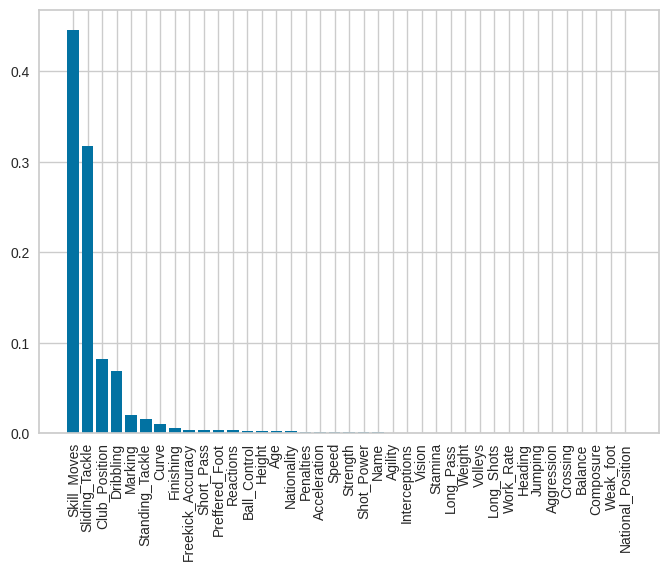

In [62]:
#evaluación y clasificación segun importancia
importances = model_full.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train_encoded.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_encoded.shape[1]), X_train_encoded.columns[indices], rotation=90)
plt.show()


In [63]:
feature_importance = pd.DataFrame({
    'Feature': X_train_encoded.columns[indices],
    'Importance': importances[indices]
})
print(feature_importance)


              Feature    Importance
0         Skill_Moves  4.458348e-01
1      Sliding_Tackle  3.173715e-01
2       Club_Position  8.235147e-02
3           Dribbling  6.909726e-02
4             Marking  1.998586e-02
5     Standing_Tackle  1.570574e-02
6               Curve  9.718328e-03
7           Finishing  5.320588e-03
8   Freekick_Accuracy  3.434917e-03
9          Short_Pass  3.393191e-03
10     Preffered_Foot  3.288264e-03
11          Reactions  3.086408e-03
12       Ball_Control  2.377441e-03
13             Height  2.193597e-03
14                Age  1.982834e-03
15        Nationality  1.953297e-03
16          Penalties  1.803782e-03
17       Acceleration  1.689922e-03
18              Speed  1.635906e-03
19           Strength  1.184565e-03
20         Shot_Power  1.047602e-03
21               Name  7.704527e-04
22            Agility  6.748032e-04
23      Interceptions  5.565064e-04
24             Vision  5.363948e-04
25            Stamina  4.970654e-04
26          Long_Pass  4.660

In [65]:
#Busqueda recursiva
from sklearn.feature_selection import RFE

# Inicializar RFE con el modelo XGBoost
selector = RFE(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), n_features_to_select=5)
selector.fit(X_train_encoded, y_train_encoded)

# Características seleccionadas
selected_features = X_train_encoded.columns[selector.support_]
print(f"Características seleccionadas: {selected_features}")


Características seleccionadas: Index(['Club_Position', 'Skill_Moves', 'Dribbling', 'Marking',
       'Sliding_Tackle'],
      dtype='object')


In [66]:
#Busqueda recursiva N=10
from sklearn.feature_selection import RFE

# Inicializar RFE con el modelo XGBoost
selector = RFE(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), n_features_to_select=10)
selector.fit(X_train_encoded, y_train_encoded)

# Características seleccionadas
selected_features = X_train_encoded.columns[selector.support_]
print(f"Características seleccionadas: {selected_features}")


Características seleccionadas: Index(['Name', 'Club_Position', 'Skill_Moves', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Finishing', 'Curve',
       'Freekick_Accuracy'],
      dtype='object')


In [67]:
#Busqueda recursiva N=15
from sklearn.feature_selection import RFE

# Inicializar RFE con el modelo XGBoost
selector = RFE(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), n_features_to_select=15)
selector.fit(X_train_encoded, y_train_encoded)

# Características seleccionadas
selected_features = X_train_encoded.columns[selector.support_]
print(f"Características seleccionadas: {selected_features}")

Características seleccionadas: Index(['Name', 'Club_Position', 'Preffered_Foot', 'Age', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Reactions', 'Speed', 'Finishing', 'Curve',
       'Freekick_Accuracy'],
      dtype='object')


In [75]:
n_features = 10

X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

model_reduced = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_reduced.fit(X_train_selected, y_train_encoded)

# Evaluación del modelo reducido
y_pred_reduced = model_reduced.predict(X_test_selected)
accuracy_reduced = accuracy_score(y_test_encoded, y_pred_reduced)
print(f"✅ Precisión del modelo reducido con {n_features} características:", accuracy_reduced)
print(f"Precisión del modelo con todas las características: {acc_full}")



✅ Precisión del modelo reducido con 5 características: 0.998730964467005
Precisión del modelo con todas las características: 0.998730964467005


El modelo reducido con 10 características obtuvo una precisión de 0.9987, exactamente igual a la del modelo original con todas las variables, lo que indica que el rendimiento es equivalente tanto en precisión como en robustez. Esto sugiere que muchas variables no aportaban valor significativo al modelo. La eliminación de características irrelevantes conlleva varios beneficios: simplifica el modelo, reduce el tiempo de entrenamiento y puede mejorar su capacidad de generalización al disminuir el riesgo de sobreajuste. Además, un modelo con menor dimensionalidad es más fácil de interpretar, ya que al centrarse solo en las variables más influyentes, se facilita la comprensión del comportamiento del modelo y se mejora la capacidad de explicar sus decisiones.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# Cargar dataset y preparar etiqueta binaria
df['label'] = df['National_Position'].notna().astype(int)

# Iniciar PyCaret
clf_setup = setup(data=df, target='label',
                  session_id=123,
                  verbose=False,
                  fold=5,
                  html=False)

# Comparar modelos según precisión
best_model = compare_models(sort='Precision',
                            include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'])

# Obtener datos transformados para evitar errores con nombres de columnas
X_train = get_config('X_train_transformed')
y_train = get_config('y_train')
X_test = get_config('X_test_transformed')
y_test = get_config('y_test')

# Brier Score antes de calibrar
probs_uncalibrated = best_model.predict_proba(X_test)[:, 1]
brier_before = brier_score_loss(y_test, probs_uncalibrated)
print("Brier Score antes de calibrar:", brier_before)

# Calibrar el modelo con método isotónico (monótono)
calibrated_model = CalibratedClassifierCV(best_model, method='isotonic', cv=5)
calibrated_model.fit(X_train, y_train)

# Brier Score después de calibrar
probs_calibrated = calibrated_model.predict_proba(X_test)[:, 1]
brier_after = brier_score_loss(y_test, probs_calibrated)
print("Brier Score después de calibrar:", brier_after)

# Graficar curvas de calibración
plt.figure(figsize=(8, 6))

# Curva sin calibrar
prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, probs_uncalibrated, n_bins=10)
plt.plot(prob_pred_uncal, prob_true_uncal, marker='o', label='Sin calibrar')

# Curva calibrada
prob_true_cal, prob_pred_cal = calibration_curve(y_test, probs_calibrated, n_bins=10)
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='Calibrado (Isotonic)')

# Línea ideal
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal')

plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia observada')
plt.title('Curvas de Calibración')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>